<a href="https://colab.research.google.com/github/waveology/aire/blob/main/tema8_contraste_de_hipotesis_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contraste de hipótesis II

* Vamos a aplicar el contraste de hipótesis al análisis de datos de calidad del aire. 

* Usaremos, como hasta ahora datos, de libre acceso: 
  * [meteorológicos de AEMET](https://https://datos.comunidad.madrid/catalogo/dataset/calidad_aire_datos_meteo_historico) 
  * [de contaminación de la Comunidad de Madrid](https://https://datos.comunidad.madrid/catalogo/dataset/calidad_aire_datos_historico).

###1. Copia del repositorio de datos
---

* Descargamos el repositorio de código y datos para trabajar más cómodamente:

In [1]:
# Directorio de trabajo en Colab 
# ------------------------------------------------------------
%cd /content

# Si existe una copia previa del repositorio, la borramos:
# ----------------------------------------------------------------------------
!  rm -rf aire

# Creamos una copia del repositorio SOLO si no existe previamente
# ----------------------------------------------------------------------------
! [ ! -d aire ] && git clone https://github.com/waveology/aire.git

# Entramos en el repositorio que acabamos de copiar
# --------------------------------------------------
%cd aire

/content
Cloning into 'aire'...
remote: Enumerating objects: 353, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 353 (delta 8), reused 1 (delta 1), pack-reused 330
Receiving objects: 100% (353/353), 19.82 MiB | 14.91 MiB/s, done.
Resolving deltas: 100% (198/198), done.
/content/aire


* Importamos las extensiones que vamos a necesitar. 

* Para simplificar la tarea hemos empaquetado las funciones de lectura de datos en un fichero independiente (lectura_de_datos.py) 

In [13]:
import lectura_de_datos                                   # lee ficheros de datos meteorológicos y de contaminación de Madrid
import matplotlib.pyplot as plt

###2. Inventario de magnitudes
---

* Por conveniencia, hemos introducido en "lectura_de_datos.py" el inventario de estaciones de medida de la contaminación.
* Listamos los campos: **código | municipio | nombre**

In [3]:
# Simplemente escribimos el nombre de la variable para visualizar su contenido
# -----------------------------------------------------------------------------
lectura_de_datos.estalist_com

{28005002: (5, 'ALCALÁ DE HENARES'),
 28006004: (6, 'ALCOBENDAS'),
 28007004: (7, 'ALCORCÓN'),
 28009001: (9, 'ALGETE'),
 28013002: (13, 'ARANJUEZ'),
 28014002: (14, 'ARGANDA DEL REY'),
 28016001: (16, 'EL ATAZAR'),
 28045002: (45, 'COLMENAR VIEJO'),
 28047002: (47, 'COLLADO VILLALB A'),
 28049003: (49, 'COSLADA'),
 28058004: (58, 'FUENLABRADA'),
 28065014: (65, 'GETAFE'),
 28067001: (67, 'GUADALIX DE LA SIERRA'),
 28074007: (74, 'LEGANÉS'),
 28080003: (80, 'MAJADAHONDA'),
 28092005: (92, 'MÓSTOLES'),
 28102001: (102, 'ORUSCO DE TAJUÑA'),
 28120001: (120, 'PUERTO DE COTOS'),
 28123002: (123, 'RIVAS-VACIAMADRID'),
 28133002: (133, 'SAN MARTÍN DE VALDEIGLESIAS'),
 28148004: (148, 'TORREJÓN DE ARDOZ'),
 28161001: (161, 'VALDEMORO'),
 28171001: (171, 'VILLA DEL PRADO'),
 28180001: (180, 'VILLAREJO DE SALVANÉS')}

* Listamos los contaminantes registrados.
* **código | magnitud | unidades**

In [4]:
# Simplemente escribimos el nombre de la variable para visualizar su contenido
# -----------------------------------------------------------------------------
lectura_de_datos.maglist_com

{1: ('Dióxido de azufre', 'μg/m³'),
 6: ('Monóxido de carbono', 'mg/m³'),
 7: ('Monóxido de nitrógeno', 'μg/m³'),
 8: ('Dióxido de nitrógeno', 'μg/m³'),
 9: ('Partículas en suspensión < PM2.5', 'μg/m³'),
 10: ('Partículas en suspensión < PM10', 'μg/m³'),
 12: ('Óxidos de nitrógeno', 'μg/m³'),
 14: ('Ozono', 'μg/m³'),
 20: ('Tolueno', 'μg/m³'),
 22: ('Black Carbon', 'μg/m³'),
 30: ('Benceno', 'μg/m³'),
 42: ('Hidrocarburos totales', 'mg/m³'),
 44: ('Hidrocarburos no metánicos', 'mg/m³'),
 431: ('MetaParaXileno', 'μg/m³')}

* Y por último, la magnitudes meteorológicas
* **código | magnitud | unidades**

In [5]:
# Simplemente escribimos el nombre de la variable para visualizar su contenido
# -----------------------------------------------------------------------------
lectura_de_datos.maglist_meteo

{81: ('Velocidad del viento', 'm/s'),
 82: ('Dirección del viento', 'º'),
 83: ('Temperatura', 'ºC'),
 86: ('Humedad relativa', '%'),
 87: ('Presión atmosférica', 'hPa'),
 88: ('Radiación solar', 'W/m2'),
 89: ('Precipitación', 'mm')}

###3. Carga de datos
---

* Vamos a cargar datos correspondientes a dos años distintos


In [15]:


# Ejemplo con datos de contaminación
# ----------------------------------
anio1 = '2019'
anio2 = '2020'

df1, magnitud1, unidades1,estacion1 = lectura_de_datos.contaminacion(
                                    'datos/contaminacion/%s.csv' % anio1,
                                     codigo_magnitud = 8,          # NO2
                                     codigo_estacion = 28067001    # Getafe
                                     ) 

df2, magnitud2, unidades2,estacion2 = lectura_de_datos.contaminacion(
                                    'datos/contaminacion/%s.csv' % anio2,
                                     codigo_magnitud = 8 ,         # NO2
                                     codigo_estacion = 28067001    # Getafe
                                     ) 
df1.rename(columns={'valor':anio1}, inplace=True)
df2.rename(columns={'valor':anio2}, inplace=True)

print(df1.describe())
print(df2.describe())

 -Info: encontrados datos de 365 días
 -Info: encontrados datos de 366 días
             2019
count  8665.00000
mean     11.17311
std      10.23725
min       1.00000
25%       4.00000
50%       7.00000
75%      14.00000
max      87.00000
              2020
count  8681.000000
mean      9.890681
std       8.789783
min       1.000000
25%       4.000000
50%       7.000000
75%      13.000000
max      72.000000


###4. Inspección visual
---

* Echamos un vistazo a ambas series temporales para estimar visualmente si evolucionan siguiendo un mismo patrón

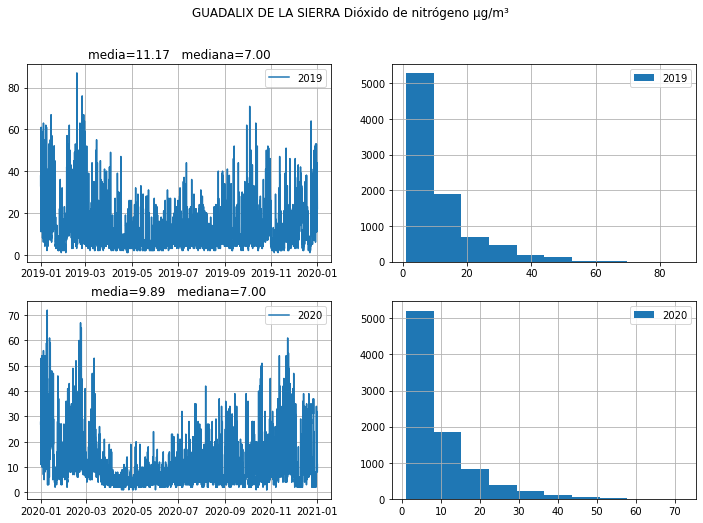

In [33]:
# Cada serie en un gráfico independiente
# ---------------------------------------
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(12,8))
ax[0,0].plot(df1[anio1],label=anio1)
ax[0,0].set_title('media=%.2f   mediana=%.2f' %(df1[anio1].mean(),df1[anio1].median()))

ax[0,1].hist(df1[anio1],label=anio1)

ax[1,0].plot(df2[anio2],label=anio2)
ax[1,0].set_title('media=%.2f   mediana=%.2f' %(df2[anio2].mean(),df2[anio2].median()))

ax[1,1].hist(df2[anio2],label=anio2)


for a in ax.flatten() :
   a.grid(True)
   a.legend()
   #a.set_ylim(0,200)
plt.suptitle('%s %s %s' % (estacion1,magnitud1,unidades1))   
plt.show()

###5. Comparación de series
---

* Representamos una serie de datos respecto a la otra:

In [ ]:
# Dibujamos la columna 1 (PM10) frente a la columna 2 (PM2.5)
# --------------------------------------------------------------
ax = df.plot(x=col1, y=col2,
    marker='o',                                           # Símbolo
    ms=3,                                                 # Tamaño del símbolo
    lw=0,                                                 # Grosor de líneas de conexión
    color='blue',                                         # Color
    grid=True,                                            # Rejilla
    figsize=(12,8),                                       # Tamaño del gráfico
    legend=False,                                         # Leyenda
    title='%s vs %s   -    %s  -  %s' % (magnitud2,magnitud1,estacion1,anio),                 # Titulo        
    xlabel= '%s %s' % (magnitud1,unidades1),              # Etiqueta X   
    ylabel= '%s %s' % (magnitud2,unidades2),              # Etiqueta Y   
    xlim=(0,125),
    ylim=(0,125)
)

# Para facilitar la comparación hacemos que los ejes tengan las mismas dimensiones
# ----------------------------------------------------------------------------------
ax.set_aspect('equal')

# Añadimos una línea en la diagonal
# ----------------------------------------------------------------------------------
ax.plot([0,125],[0,125], color='red', ls='--', lw=2)



# Dibujamos
# ---------
plt.show()

###6. Regresión a una recta
---

* Vamos a buscar la expresión de la recta que ***describe*** el comportamiento conjunto de ambas variables
* Creamos un modelo lineal para ajustar los datos

* Antes que nada:

In [ ]:
# Nuestros datos son leídos en filas 
# -----------------------------------
print('datos en fila ', np.array(df[col1]))

# Sin embargo las funciones que vamos a usar requieren
# que una de ellas tenga formato de columna
# -----------------------------------------
print('datos en columna ', np.array(df[col1]).reshape(-1,1))

# Por eso las redefinimos así:
# -----------------------------
x = np.array(df[col1]).reshape(-1,1)  # Convierte una fila en una columna
y = np.array(df[col2])

* Ahora podemos continuar

In [ ]:
 # Definimos nuestro modelo de regresión
 # ---------------------------------------
 model     = LinearRegression().fit(x,y)

 # Calculamos los valores resultantes del ajuste
 # ----------------------------------------------
 ajuste    = model.predict(x)

* Representamos el resultado

In [ ]:
# Definimos el dibujo
# ---------------------------------------
fig, ax = plt.subplots(figsize=(12,8))

# Dibujamos x respecto a y
# ------------------------------
ax.plot(x,y,
        marker = 'o',
        ms     =  3,
        lw     =  0,
        color  = 'blue'
        )

# Superponemos los valores calculados del ajuste
# -----------------------------------------------
ax.plot(x,ajuste, ls='-', lw=3, color='black')

# Fija los límites del gráfico
# ------------------------------
ax.set_xlim(0,125),
ax.set_ylim(0,125)        

# Añadimos una línea en la diagonal
# ----------------------------------------------------------------------------------
ax.plot([0,125],[0,125], color='red', ls='--', lw=2)

# Para facilitar la comparación hacemos que los ejes tengan las mismas dimensiones
# ----------------------------------------------------------------------------------
ax.set_aspect('equal')

# Añadimos una rejilla de fondo
# -------------------------------
ax.grid(True)

# Añadimos un título
# -------------------
ax.set_title('%s VS %s   -    %s  -  %s' % (magnitud2,magnitud1,estacion1,anio)) # Titulo        

# Añadimos etiquetas a los ejes
# -----------------------------
ax.set_xlabel('%s %s' % (magnitud1,unidades1))                                   # Etiqueta X   
ax.set_ylabel('%s %s' % (magnitud2,unidades2))                                   # Etiqueta Y 

# Dibujamos
# ---------
plt.show()  

* La línea en negro sintetiza el mejor ajuste lineal a nuestra nube de puntos
* Para cuantificar la calidad del ajuste se suele recurrir al llamado coeficiente de determinación $R^{2}$
* $R^{2}$ toma valores entre cero (mal ajuste) y 1 (ajuste perfecto).

In [ ]:
# Podemos calcular fácilmente el valor del coeficiente de determinación
# -----------------------------------------------------------------------
r2 = model.score(x,y)

# Mostramos en pantalla
# ------------------------
print('R\u00b2 = %f' % r2)

* El valor en el que la recta de ajuste intercepta al eje y se obtiene mediante:

In [ ]:
# Valor con el que la recta de ajuste intercepta al eje Y
# ----------------------------------------------------------
b = model.intercept_

# Mostramos en pantalla
# ---------------------
print('b = %f' % b)

* Y también podemos obtener la pendiente de la recta:

In [ ]:
# Pendiente de la recta de ajuste
# -----------------------------------
a = model.coef_

# Mostramos en pantalla
# ----------------------
print('a = %f' % a[0])

* De manera que nuestra recta de ajuste viene dada por:

### <center>$Y  = a * X + b$</center>

* Podemos incorporar esta información al gráfico:

In [ ]:
# Expresión de la recta de ajuste en texto
# ------------------------------------------
info_ajuste  = 'Y = %.3f * X + %.3f\nR$^{2}=%.3f$' % (a,b,r2)

# Título para el gráfico
# ----------------------
titulo       = '\n%s VS %s   -    %s  -  %s\n%s' % (magnitud2,magnitud1,estacion1,anio,info_ajuste)

# Dimensionamos el gráfico
# -------------------------
fig, ax = plt.subplots(figsize=(12,8))

# Dibujamos los datos 
# -------------------
ax.plot(x,y,
        marker = 'o',
        ms     =  3,
        lw     =  0,
        color  = 'blue'
        )

# Fija los límites del gráfico
# ------------------------------
ax.set_xlim(0,125)
ax.set_ylim(0,125)        

# Añadimos una línea en la diagonal
# ----------------------------------------------------------------------------------
ax.plot([0,125],[0,125], color='red', ls='--', lw=2)

# Para facilitar la comparación hacemos que los ejes tengan las mismas dimensiones
# ----------------------------------------------------------------------------------
ax.set_aspect('equal')

# Dibujamos la recta de ajuste
# -----------------------------
ax.plot(x,ajuste, ls='-', lw=3, color='black')

# Ponemos una rejilla de fondo
# ----------------------------
ax.grid(True)

# Posicionamos el título
# -----------------------
ax.set_title(titulo, loc='center')                             # Titulo        

# Etiquetas para los ejes
# ------------------------
ax.set_xlabel('%s %s' % (magnitud1,unidades1))   # Etiqueta X   
ax.set_ylabel('%s %s' % (magnitud2,unidades2))   # Etiqueta Y 

# Dibujo
# --------
plt.show()  

###7. Regresión a un polinomio
---

* Una línea recta puede no ser el mejor ajuste para determinados conjuntos de datos
* Podemos aumentar los grados de libertad del ajuste usando funciones que admitan diferentes grados de curvatura
* Por ejemplo un polinomio cúbico:

### <center>$Y = a\ X^{3} + b\ X^{2} + c\ X + d$</center>

In [ ]:
# En este caso no es necesario la conversión de filas en columnas
# ---------------------------------------------------------------

# Volvemos a extraer las columnas de datos del dataframe
# -------------------------------------------------------
x = np.array(df[col1])
y = np.array(df[col2])

In [ ]:
# Regresión polinomial de grado n
# -------------------------------
poly = PolynomialFeatures(degree=3, include_bias=False)

# Preparación de datos
# ---------------------
poly_features = poly.fit_transform(x.reshape(-1, 1))

# Realizamos el ajuste
# ---------------------
model = LinearRegression()
model.fit(poly_features,y)

# Resultados
ajuste = model.predict(poly_features)

# Estos son los coeficientes del polinomio
c, b, a   = model.coef_
d         = model.intercept_

# El coeficiente de determinación
# --------------------------------
r2    = r2_score(y, ajuste)

# El error cuadrático medio (RMSE)
# ----------------------------------
rmse  = np.sqrt(mean_squared_error(y, ajuste ))

# Mostramos los coeficientes del polinomio
# ----------------------------------------
print('a = %f\nb = %f\nc = %f\nd = %f' % (a,b,c,d))

# Mostramos el error/calidad del ajuste
# ---------------------------------------
print('\nEl coeficiente de determinación es: %.2f' % r2)
print('El error RMS es : %.2f' % rmse)

* Representamos gráficamente

In [ ]:
# Vamos a generar los valores del polinomio de tercer grado
# ---------------------------------------------------------
xn        = np.arange(x.min(),x.max(),step=1)
polinomio = a * xn**3 + b * xn**2 + c * xn + d

In [ ]:
# Configuramos el gráfico
# ------------------------
fig, ax = plt.subplots(figsize=(12,8))

# Dibujamos los puntos
# ----------------------
ax.plot(x,y,
        marker = 'o',
        ms     = 3,
        lw     = 0,
        color  = 'blue'
        )

# Fija los límites del gráfico
# ------------------------------
ax.set_xlim(0,125)
ax.set_ylim(0,125)        

# Añadimos una línea en la diagonal
# ----------------------------------------------------------------------------------
ax.plot([0,125],[0,125], color='red', ls='--', lw=2)

# Para facilitar la comparación hacemos que los ejes tengan las mismas dimensiones
# ----------------------------------------------------------------------------------
ax.set_aspect('equal')

# Dibujamos el polinomio
# -----------------------
ax.plot(xn,polinomio, marker=None, ms=0, lw=3,color='black')

# Añadimos una rejilla
# ---------------------
ax.grid(True)

# Escribimos el polinomio en texto para el título
# -------------------------------------------------
poli  = 'Y = (%.4f) * x$^{3}$ + (%.4f) * x$^{2}$ + (%.4f) * X + (%.4f)' % (a,b,c,d)
error = 'R$^{2}$ = %.2f\nRMSE = %.1f' % (r2,rmse)

# Ponemos el título
# ------------------
ax.set_title('%s VS %s   -    %s  -  %s\n%s\n%s' % (magnitud2,magnitud1,estacion1,anio,poli,error)) # Titulo  

# Etiquetas para los ejes
# -------------------------
ax.set_xlabel('%s %s' % (magnitud1,unidades1))                                   # Etiqueta X   
ax.set_ylabel('%s %s' % (magnitud2,unidades2))                                   # Etiqueta Y  

# Dibujo
plt.show()

###8. Eliminación de datos atípicos
---

* ¿Cómo cambia el resultado de los ajustes cuando se depuran los datos?
* Vamos a eliminar los valores **atípicos extremos** 

In [ ]:
# Calculamos los percentiles 25 y 75 de la primera columna
# ---------------------------------------------------------
p25_x, p75_x = df['pm2.5'].quantile((0.25,0.75))

# Calculamos el rango intercuartílico de la primera columna
# --------------------------------------------------------
riq_x = p75_x - p25_x

# Calculamos los percentiles 25 y 75 de la segunda  columna
# ---------------------------------------------------------
p25_y, p75_y = df['pm10'].quantile((0.25,0.75))

# Calculamos el rango intercuartílico de la primera columna
# --------------------------------------------------------
riq_y = p75_y - p25_y

# Eliminamos los valores que se encuentran más allá
# de 1.5 veces el rango intercuartílico
# ---------------------------------------------------
df1 = df[
        (df['pm2.5'] > (p25_x - 3.0 * riq_x))  & 
        (df['pm2.5'] < (p75_x + 3.0 * riq_x))  & 
        (df['pm10']  > (p25_y - 3.0 * riq_y))  & 
        (df['pm10']  < (p75_y + 3.0 * riq_y)) 
        ]

print(p25_x-3.0*riq_x,  p75_x+3.0*riq_x)
print(p25_y-3.0*riq_y,  p75_y+3.0*riq_y)
print('Eliminados %d datos atípicos' % (len(df)-len(df1)))


* Para ver los nuevos resultados:
  * volvemos a extraer los datos del dataframe
  * ejecutamos de nuevo los bloques 7 y 8

In [ ]:
x = np.array(df1[col1])
y = np.array(df1[col2])

###9. Resumen
---

* En este notebook hemos visto algunos aspectos relacionados con la correlación de series temporales:
  * Comparación visual
  * Regresión a una recta
  * Regresión polinomial
  * Evaluación de la calidad de los ajustes
  * Efecto de la depuracion en las regresiones